In [ ]:
'''
Dựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng
Dataset: FuelConsumptionCo2.csv
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and quick view data

In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(1067, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
for c in data.select_dtypes('object').columns:
    print(c)
    print(data[c].unique())

MAKE
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
MODEL
['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7' 'S8' 'SQ5' 'TT COUPE QUATTRO' 'TT ROADSTER QUATTRO'
 'TTS COUPE QUATTRO' 'TTS ROADSTER QUATTRO' 'CONTINENTAL GT'
 'CONTINENTAL G

In [ ]:
-> object -> category

In [8]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates()

# Data Cleaning

In [6]:
for c in data.select_dtypes('object').columns:
    data[c] = data[c].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(5), float64(4), int64(4)
memory usag

In [8]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Descriptive Analysis

In [9]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
[i for i in range(1,9)]

[1, 2, 3, 4, 5, 6, 7, 8]

In [14]:
data.select_dtypes('category').describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [15]:
a = [1,2,3,4,5,100]
np.mean(a)

19.166666666666668

![](https://upload.wikimedia.org/wikipedia/commons/0/0d/Distribution_of_Annual_Household_Income_in_the_United_States_2010.png)

https://www.youtube.com/watch?v=2oJldeE4JcU

https://www.youtube.com/watch?v=rzFX5NWojp0m

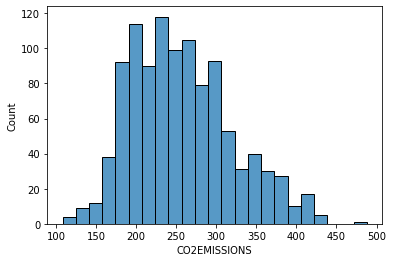

In [10]:
sns.histplot(data['CO2EMISSIONS'])

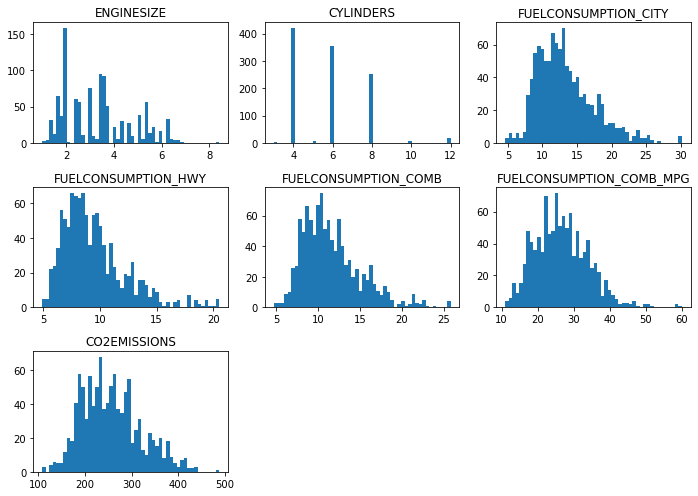

In [11]:
df_num = data.select_dtypes(exclude='category').drop('MODELYEAR',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

# Diagnostic Analysis

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

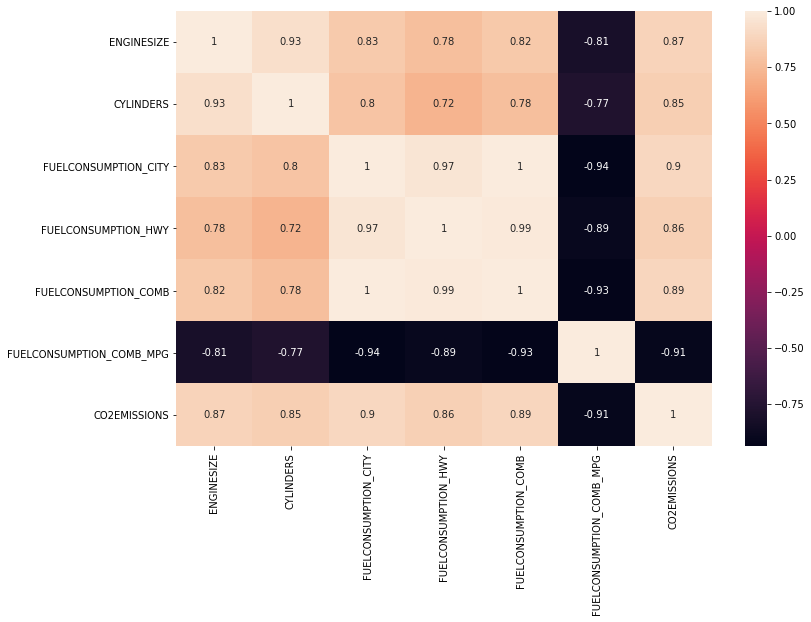

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.select_dtypes(exclude='category').drop('MODELYEAR',axis=1).corr(),annot=True)

In [28]:
data.select_dtypes(exclude='category').drop('ENGINESIZE',axis=1).corr()

,MODELYEAR,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYLINDERS,NaN,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


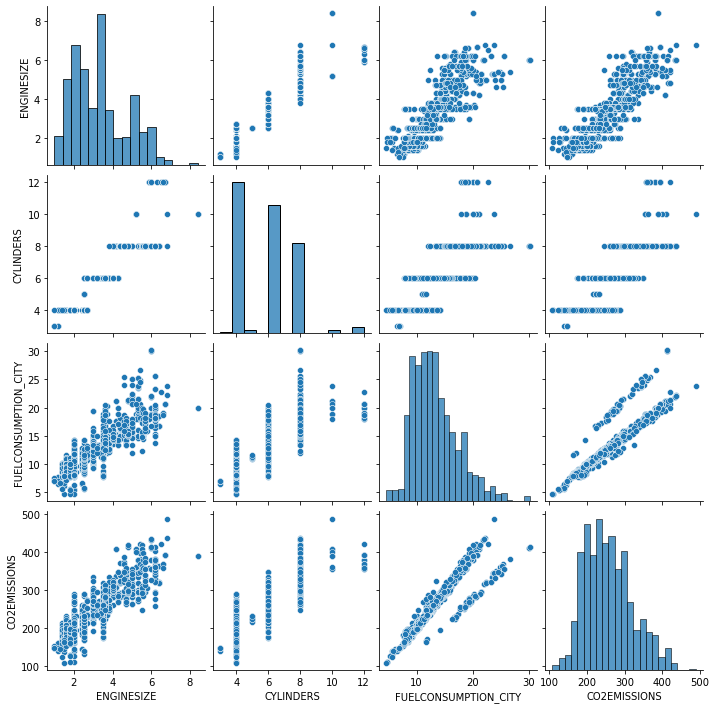

In [22]:
sns.pairplot(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']])

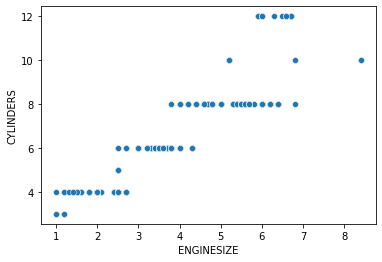

In [24]:
sns.scatterplot(x=data['ENGINESIZE'],y=data['CYLINDERS'])

# Feature Selection & Training

In [ ]:
'''
Ex1: Liệt kê các biến (columns) có mối quan hệ tuyến tính với CO2EMISSIONS (corr >= 0.5)

----> 'ENGINESIZE' và 'FUELCONSUMPTION_CITY'
'''

![](https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2020/03/Linear_Regression_fit_with_Matrix_Multiplication.jpg?fit=594%2C396&ssl=1)

https://www.youtube.com/watch?v=iIUq0SqBSH0

![](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=v2&px=400)

In [ ]:
mean_absolute_error, mean_squared_error, r2_score

![](https://i.imgur.com/19LNbyQ.jpeg)

![](https://pbs.twimg.com/media/FAX6eHvWEAIWBjB.png)

![](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSR-and-SST.jpg)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
'''
Ex2: Gọi model LinearRegression và fit vào data
'''

In [10]:
model = LinearRegression()
model.fit(data[['ENGINESIZE']],data['CO2EMISSIONS'])

LinearRegression()

In [11]:
model.coef_

array([39.12519979])

In [12]:
model.intercept_

125.30409949535726

In [ ]:
'''
Ex3: Từ a(coef_) và b(intercept_), áp dụng phương trình y = ax + b, dự đoán CO2EMISSIONS với x là ENGINESIZE
'''

In [14]:
y_manual = model.coef_ * data['ENGINESIZE'] + model.intercept_
y_manual
### y_manual = 39.1252*ENGINESIZE + 125.3041

0       203.554499
1       219.204579
2       183.991899
3       262.242299
4       262.242299
           ...    
1062    242.679699
1063    250.504739
1064    242.679699
1065    250.504739
1066    250.504739
Name: ENGINESIZE, Length: 1067, dtype: float64

In [15]:
y_model = model.predict(data[['ENGINESIZE']])
y_model

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [16]:
pd.DataFrame({'y_manual':y_manual,'y_model':y_model})

,y_manual,y_model
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


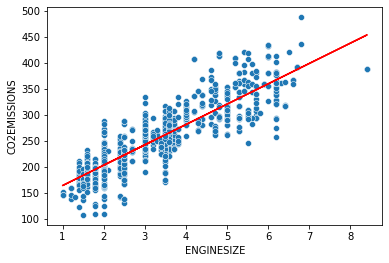

In [24]:
sns.scatterplot(data=data,x='ENGINESIZE',y='CO2EMISSIONS')
plt.plot(data['ENGINESIZE'],y_model,color='red')

# Evaluation

In [ ]:
'''
Ex4: Tính các chỉ số MAE, MSE và R2 cho model vừa dựng ở trên
'''

In [17]:
mean_absolute_error(data['CO2EMISSIONS'],y_model)

23.346887834400427

In [18]:
mean_squared_error(data['CO2EMISSIONS'],y_model)

946.314052718875

In [19]:
r2_score(data['CO2EMISSIONS'],y_model)

0.7641458597854816

![](https://spidec.files.wordpress.com/2017/05/fittings.jpg?w=702)

**Evaluation methods**
- Train - test
- Train - val - test
-> `train_test_split()`
- K-fold cross validation (K=5, 10, ...)
![](https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE']],data['CO2EMISSIONS'],\
                                                   test_size=0.2,shuffle=True,random_state=42)

In [25]:
model = LinearRegression()
model.fit(data[['ENGINESIZE']],data['CO2EMISSIONS'])
y_pred = model.predict(data[['ENGINESIZE']])
y_pred

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [26]:
mean_absolute_error(data['CO2EMISSIONS'],y_pred)

23.346887834400427

In [27]:
mean_squared_error(data['CO2EMISSIONS'],y_pred)

946.314052718875

In [28]:
r2_score(data['CO2EMISSIONS'],y_pred)

0.7641458597854816

In [29]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
'''
Ex5: Tính cross_val_score của model vừa dựng (scoring=r2)
'''

In [30]:
folds = KFold(n_splits =5,shuffle=True,random_state=42)
cross_val_score(model, X_train, y_train, scoring = 'r2', cv=folds)

array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554])

# Tuning

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],\
                                                   data['CO2EMISSIONS'],test_size=0.2,shuffle=True,random_state=42)

In [39]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
333,1.4,4,7.8
106,4.4,8,12.7
585,3.0,6,9.9
55,3.0,6,11.4
213,5.3,8,16.5


In [42]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [43]:
mean_absolute_error(y_test,y_pred2)

16.721593983516495

In [44]:
mean_squared_error(y_test,y_pred2)

512.8551370148303

In [45]:
r2_score(y_test,y_pred2)

0.8759705206914069

In [46]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data.select_dtypes(exclude='category').\
                                                    drop(['MODELYEAR','CO2EMISSIONS'],axis=1),\
                                                   data['CO2EMISSIONS'],test_size=0.2,shuffle=True,random_state=42)

In [59]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,1.4,4,8.5,6.9,7.8,36
106,4.4,8,15.0,9.8,12.7,22
585,3.0,6,11.2,8.4,9.9,29
55,3.0,6,13.2,9.2,11.4,25
213,5.3,8,18.3,14.2,16.5,17


In [60]:
param = {'n_features_to_select':list(range(1,10))}

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, param_grid = param, scoring='r2', cv = folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='r2')

In [61]:
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022394,0.023620,0.003210,0.001503,1,{'n_features_to_select': 1},0.725086,0.743304,0.783856,0.769079,...,0.759962,0.022320,9,0.771172,0.769215,0.759192,0.762272,0.760187,0.764408,0.004867
1,0.006379,0.000969,0.002224,0.000869,2,{'n_features_to_select': 2},0.824826,0.849626,0.857822,0.860602,...,0.852395,0.015123,8,0.860673,0.856333,0.854544,0.853243,0.851463,0.855251,0.003145
2,0.005822,0.000714,0.002759,0.001249,3,{'n_features_to_select': 3},0.826566,0.849762,0.860875,0.867154,...,0.854484,0.015411,6,0.861043,0.857068,0.860448,0.858146,0.858240,0.858989,0.001504
3,0.003838,0.000398,0.001873,0.000242,4,{'n_features_to_select': 4},0.826286,0.848690,0.857495,0.865247,...,0.853125,0.014997,7,0.861120,0.857275,0.860968,0.858326,0.858297,0.859197,0.001555
4,0.003326,0.000423,0.002026,0.000703,5,{'n_features_to_select': 5},0.829856,0.858337,0.881529,0.865378,...,0.864338,0.020084,5,0.866031,0.860698,0.886114,0.858336,0.884493,0.871134,0.011846
5,0.002730,0.000295,0.001671,0.000271,6,{'n_features_to_select': 6},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
6,0.002686,0.000282,0.001551,0.000060,7,{'n_features_to_select': 7},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
7,0.002918,0.000349,0.001550,0.000114,8,{'n_features_to_select': 8},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
8,0.002758,0.000310,0.001582,0.000143,9,{'n_features_to_select': 9},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881


In [62]:
pd.DataFrame(model_cv.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'r2_score')

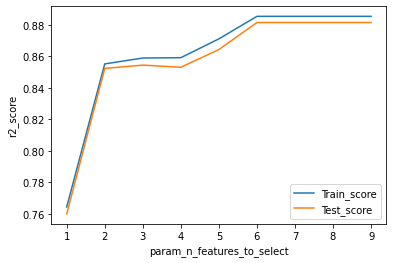

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_test_score'])
plt.legend(['Train_score','Test_score'],loc='lower right')
plt.xlabel('param_n_features_to_select')
plt.ylabel('r2_score')

In [ ]:
'''
Ex6: Dựa trên chart trên, số lượng feature tối ưu là bao nhiêu? vì sao?
'''
Số lượng feature tối ưu là 6 vì khi số lượng feature trong model là 6, việc tăng số lượng feature 
làm cho model trở nên phức tạp hơn mà không dẫn đến sự tăng r^2. Vì vậy sẽ dẫn đến khả năng model bị
overfitting